In [3]:
import post_process
import sklearn.preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
prefix = 'challenger/files-flow-spark-sgd-primary-to-all/'

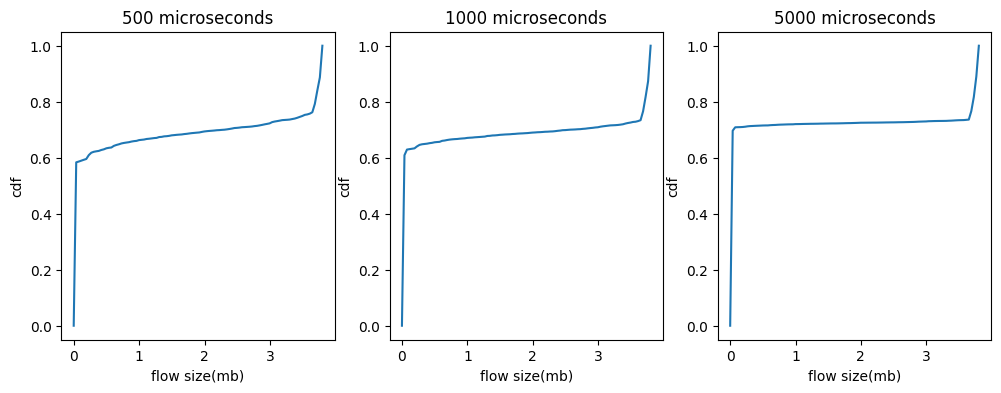

In [9]:
c = 1
nrows = 1
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,4))
for time_delta in [500, 1000, 5000]:   
    df = pd.read_csv(f'{prefix}/{time_delta}/flows.csv')
    flow_sizes = df['size'].values
    flow_sizes_values, flow_sizes_base = np.histogram(flow_sizes, bins=100)
    flow_sizes_cum = np.cumsum(flow_sizes_values)
    flow_sizes_cum = sklearn.preprocessing.minmax_scale(flow_sizes_cum, feature_range=(0, 1))
    ax1 = plt.subplot(nrows, ncols, c)
    ax1.plot(flow_sizes_base[:-1]/1000000, flow_sizes_cum, label=str(time_delta))
    ax1.set_title(f"{time_delta} microseconds")
    ax1.set_xlabel('flow size(mb)')
    ax1.set_ylabel('cdf')
    #ax1.set_xticks(np.arange(0, flow_sizes_base[-1], 50000))
    c += 1
plt.show()

In [48]:
import scienceplots

plt.style.use(['science','no-latex'])


In [45]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)